Попытки доказать Colab, что я не трачу бездарно его ресурсы (автоклик)

In [ ]:
from IPython.display import Javascript
Javascript('''
function KeepAlive() {
  console.log("Поддержание активности Colab");
  document.querySelector("colab-toolbar-button").click();
  setTimeout(KeepAlive, 15*60*1000);  // Клик каждые 15 минут
}
KeepAlive();
''')

<IPython.core.display.Javascript object>

## **Что изменилось?**
Поменяла соотношение между val_ratio/test_ratio, потому что датасет очень маленький. Смягчила предобработку, добавила blur в трансформации. Добавила dropout

torchmetrics нужно устанавливать

In [2]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 69.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 43.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

## **Клонирование репозитория или подтягивание обновлений**

In [23]:
# Клонирование репозитория
import os
if not os.path.exists('skin_lesion_segmentation'):
    !git clone https://github.com/Marianicko/skin_lesion_segmentation.git
else:
    %cd skin_lesion_segmentation
    !git pull
    %cd ..



/content/skin_lesion_segmentation
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 4 (delta 3), reused 4 (delta 3), pack-reused 0 (from 0)
Unpacking objects: 100% (4/4), 429 bytes | 429.00 KiB/s, done.
From https://github.com/Marianicko/skin_lesion_segmentation
   3c7b47e..5bbdd57  master     -> origin/master
Updating 3c7b47e..5bbdd57
Fast-forward
 src/train_2405.py | 6 ++++--
 1 file changed, 4 insertions(+), 2 deletions(-)
/content


Можно посмотреть последние коммиты:

In [24]:
# Проверка последних коммитов (опционально)
from git import Repo
repo = Repo('skin_lesion_segmentation')
print("Последние коммиты:")
for commit in list(repo.iter_commits('master', max_count=3)):
    print(f"{commit.hexsha[:7]} - {commit.message}")

Последние коммиты:
5bbdd57 - Убрала косяк с подсчётом train_iou

3c7b47e - final changes

396a3a3 - поправила пути



Пути до src и корня будем использовать ниже, добавим их в PATH

In [25]:
import sys
import os
# Правильное добавление пути к модулям
repo_path = '/content/skin_lesion_segmentation'
src_path = os.path.join(repo_path, 'src')
sys.path.insert(0, repo_path)  # Добавляем корень репозитория
sys.path.insert(0, src_path)  # Добавляем папку src

# Проверка содержимого папки src (для отладки)
print("Содержимое папки src:")
print(os.listdir(src_path))

# Проверка путей (для отладки)
print("\nПути поиска модулей:")
for path in sys.path:
    print(path)

Содержимое папки src:
['dd.py', 'preprocess.py', 'metric.py', 'unet_2405.py', 'dataset_upd_2205.py', 'train.py', 'train_2405.py', 'config.py', 'unet.py', 'dataset_upd_1505.py', 'train_2305.py', 'checkpointer_2205.py', 'model.py', 'train_new_2005.py', 'test_preprocessing.py', 'preprocess_hb.py', 'visualizations', 'dataset_upd_2405.py', 'preprocess_spec_2005.py', 'train_2205.py', 'train_2005.py', '__pycache__', 'utils.py', 'dataset_upd_2305.py', 'checkpoints', 'preprocess_spec_2305.py', 'logs', 'dataset_cur.py', 'checkpointer.py', 'preprocess_spec.py', '.ipynb_checkpoints', 'visualize.ipynb', 'loss.py', 'dataset_upd_2005.py', 'text', 'dataset_upd.py', 'train_old.py']

Пути поиска модулей:
/content/skin_lesion_segmentation/src
/content/skin_lesion_segmentation
/content/skin_lesion_segmentation/src
/content/skin_lesion_segmentation
/content
/env/python
/usr/lib/python311.zip
/usr/lib/python3.11
/usr/lib/python3.11/lib-dynload

/usr/local/lib/python3.11/dist-packages
/usr/lib/python3/dist-p

## Импорты модулей с GitHub

In [26]:
from dataset_upd_2405 import get_datasets
from model import SegmentationModel
from config import Config
from train_2405 import train, evaluate
from preprocess_spec_2305 import DermatologyPreprocessor

Проверяем доступность GPU:

In [27]:
import torch
print("Доступен GPU:", torch.cuda.is_available())
Config.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print("Устройство для обучения:", Config.DEVICE)

Доступен GPU: True
Устройство для обучения: cuda


# Внимание!
Нужно будет поменять настройки конфигурационного файла (там директории указаны таким образом, чтобы в PyCharm запускать)

In [28]:
Config.IMAGES_DIR = "/content/skin_lesion_segmentation/PH2_Dataset/trainx"
Config.MASKS_DIR = "/content/skin_lesion_segmentation/PH2_Dataset/trainy"

Проверили, что папки есть и они непусты

In [29]:
from pathlib import Path

# Укажите правильные пути (пример для Colab)
print(Config.BATCH_SIZE)

# Создаём папки, если их нет
Path(Config.IMAGES_DIR).mkdir(parents=True, exist_ok=True)
Path(Config.MASKS_DIR).mkdir(parents=True, exist_ok=True)

# Проверка данных
assert len(os.listdir(Config.IMAGES_DIR)) > 0, "Нет изображений!"
assert len(os.listdir(Config.MASKS_DIR)) > 0, "Нет масок!"
print(f"Найдено {len(os.listdir(Config.IMAGES_DIR))} изображений и {len(os.listdir(Config.MASKS_DIR))} масок")

4
Найдено 200 изображений и 200 масок


(Тут была диагностика, вставь при необходимости)

In [30]:
Config.LOGS_DIR = "/content/skin_lesion_segmentation/logs"
Config.CHECKPOINTS_DIR = "/content/skin_lesion_segmentation/checkpoints"

## **Настройка весов модели**
Рассказать про подбор

In [31]:
Config.CLASS_WEIGHTS = [0.7, 0.3]

## **Функция для визуализации результатов:**

Прошлый вариант plot_training_curves сталкивался с ошибкой - несоответствие размеров массивов. Исправляем:

In [32]:
import matplotlib.pyplot as plt

In [33]:
def plot_training_curves(log_dir=Config.LOGS_DIR):
    import pandas as pd
    from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

    # Загружаем данные из TensorBoard
    event_acc = EventAccumulator(log_dir)
    event_acc.Reload()

    # Собираем метрики с проверкой наличия
    metrics = {}
    for tag in ['Loss_train', 'Loss_val', 'IoU/val', 'Best_IoU', 'Best_Loss']:
        if tag in event_acc.Tags()['scalars']:
            metrics[tag] = [e.value for e in event_acc.Scalars(tag)]
        else:
            print(f"Предупреждение: метрика {tag} не найдена в логах")
            metrics[tag] = []

    # Определяем общее количество эпох
    max_length = max(len(metrics[tag]) for tag in metrics) if metrics else 0
    if max_length == 0:
        print("Нет данных для визуализации")
        return

    # Выравниваем массивы по длине
    aligned_metrics = {}
    for tag in metrics:
        if len(metrics[tag]) < max_length:
            aligned_metrics[tag] = metrics[tag] + [None] * (max_length - len(metrics[tag]))
        else:
            aligned_metrics[tag] = metrics[tag][:max_length]

    # Создаем DataFrame
    df = pd.DataFrame({
        'epoch': range(max_length),
        'train_loss': aligned_metrics.get('Loss_train', [None]*max_length),
        'val_loss': aligned_metrics.get('Loss_val', [None]*max_length),
        'val_iou': aligned_metrics.get('IoU/val', [None]*max_length),
        'best_iou': aligned_metrics.get('Best_IoU', [None]*max_length),
        'best_loss': aligned_metrics.get('Best_Loss', [None]*max_length)
    }).dropna(how='all', subset=['train_loss', 'val_loss'])  # Удаляем пустые строки

    if df.empty:
        print("Нет данных для построения графиков")
        return

    # Рисуем графики
    plt.figure(figsize=(15, 5))

    # График Loss
    plt.subplot(1, 2, 1)
    plt.plot(df['epoch'], df['train_loss'], label='Train Loss')
    plt.plot(df['epoch'], df['val_loss'], label='Val Loss')
    if not df['best_loss'].isnull().all():
        plt.plot(df['epoch'], df['best_loss'], '--', label='Best Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # График IoU
    plt.subplot(1, 2, 2)
    if not df['val_iou'].isnull().all():
        plt.plot(df['epoch'], df['val_iou'], label='Val IoU')
    if not df['best_iou'].isnull().all():
        plt.plot(df['epoch'], df['best_iou'], '--', label='Best IoU')
    plt.xlabel('Epoch')
    plt.ylabel('IoU')
    plt.legend()

    plt.tight_layout()
    plt.show()

##**Настройки обучения**
Можно выбрать - включать предобработку или нет (по умолчанию предобработка включена, эпох 50, но это было убийственно для предобработанных изображений, поэтому 25)

In [56]:
Config.EPOCHS = 25
Config.PREPROCESS_FLAG = True

In [57]:
print(Config.EPOCHS, Config.PREPROCESS_FLAG, Config.LOGS_DIR)

25 True /content/skin_lesion_segmentation/logs


Тренировка + валидация:

It's okay
It's okay
It's okay
It's okay


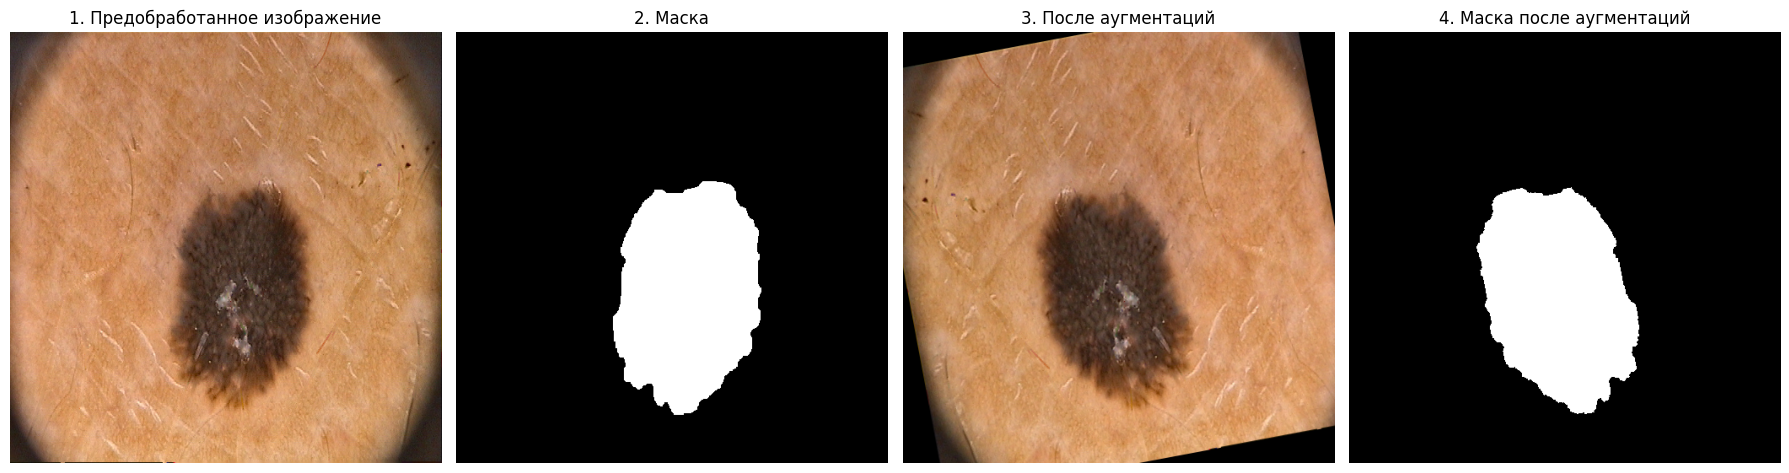

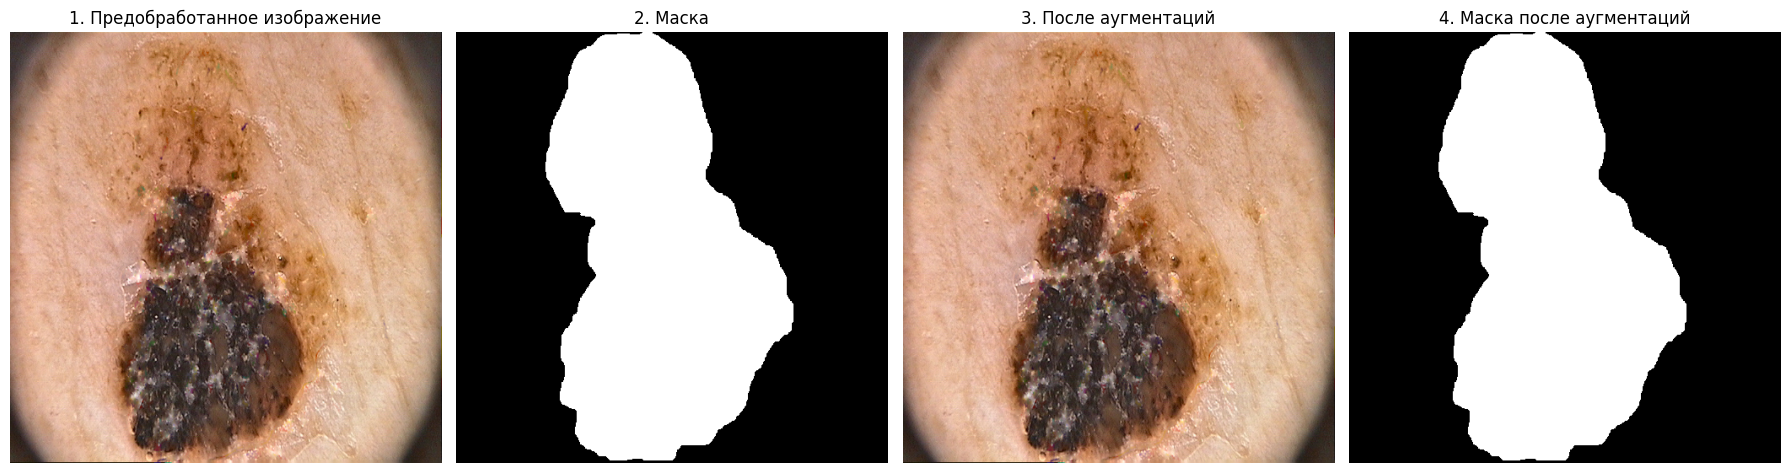

Epoch 1: 100%|██████████| 40/40 [01:12<00:00,  1.81s/it]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.5937, Loss=0.4511 (epoch 1)


Epoch 1/25 | Train Loss: 0.5727 | Val Loss: 0.4511 | Val IoU: 0.5937 | LR = 1.00e-04 | Best IoU: 0.5937 | Best Loss: 0.4511


Epoch 2: 100%|██████████| 40/40 [01:11<00:00,  1.78s/it]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8116, Loss=0.3285 (epoch 2)


Epoch 2/25 | Train Loss: 0.4187 | Val Loss: 0.3285 | Val IoU: 0.8116 | LR = 1.00e-04 | Best IoU: 0.8116 | Best Loss: 0.3285


Epoch 3: 100%|██████████| 40/40 [01:11<00:00,  1.80s/it]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8116, Loss=0.3285 (epoch 2)


Epoch 3/25 | Train Loss: 0.3474 | Val Loss: 0.3106 | Val IoU: 0.6988 | LR = 1.00e-04 | Best IoU: 0.8116 | Best Loss: 0.3106


Epoch 4: 100%|██████████| 40/40 [01:12<00:00,  1.81s/it]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8116, Loss=0.3285 (epoch 2)


Epoch 4/25 | Train Loss: 0.3254 | Val Loss: 0.2890 | Val IoU: 0.7279 | LR = 1.00e-04 | Best IoU: 0.8116 | Best Loss: 0.2890


Epoch 5: 100%|██████████| 40/40 [01:13<00:00,  1.83s/it]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8116, Loss=0.3285 (epoch 2)


Epoch 5/25 | Train Loss: 0.3080 | Val Loss: 0.2576 | Val IoU: 0.7951 | LR = 1.00e-04 | Best IoU: 0.8116 | Best Loss: 0.2576


Epoch 6: 100%|██████████| 40/40 [01:12<00:00,  1.81s/it]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8178, Loss=0.2700 (epoch 6)


Epoch 6/25 | Train Loss: 0.3101 | Val Loss: 0.2700 | Val IoU: 0.8178 | LR = 1.00e-04 | Best IoU: 0.8178 | Best Loss: 0.2576


Epoch 7: 100%|██████████| 40/40 [01:12<00:00,  1.82s/it]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8178, Loss=0.2700 (epoch 6)


Epoch 7/25 | Train Loss: 0.2520 | Val Loss: 0.2541 | Val IoU: 0.7872 | LR = 1.00e-04 | Best IoU: 0.8178 | Best Loss: 0.2541


Epoch 8: 100%|██████████| 40/40 [01:12<00:00,  1.80s/it]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8178, Loss=0.2700 (epoch 6)


Epoch 8/25 | Train Loss: 0.2498 | Val Loss: 0.2234 | Val IoU: 0.7586 | LR = 1.00e-04 | Best IoU: 0.8178 | Best Loss: 0.2234


Epoch 9: 100%|██████████| 40/40 [01:12<00:00,  1.81s/it]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8291, Loss=0.1905 (epoch 9)


Epoch 9/25 | Train Loss: 0.2381 | Val Loss: 0.1905 | Val IoU: 0.8291 | LR = 1.00e-04 | Best IoU: 0.8291 | Best Loss: 0.1905


Epoch 10: 100%|██████████| 40/40 [01:11<00:00,  1.79s/it]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8291, Loss=0.1905 (epoch 9)


Epoch 10/25 | Train Loss: 0.2564 | Val Loss: 0.2414 | Val IoU: 0.7699 | LR = 1.00e-04 | Best IoU: 0.8291 | Best Loss: 0.1905


Epoch 11: 100%|██████████| 40/40 [01:10<00:00,  1.76s/it]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8291, Loss=0.1905 (epoch 9)


Epoch 11/25 | Train Loss: 0.2310 | Val Loss: 0.2148 | Val IoU: 0.8088 | LR = 1.00e-04 | Best IoU: 0.8291 | Best Loss: 0.1905


Epoch 12: 100%|██████████| 40/40 [01:10<00:00,  1.75s/it]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8291, Loss=0.1905 (epoch 9)


Epoch 12/25 | Train Loss: 0.2335 | Val Loss: 0.2018 | Val IoU: 0.7967 | LR = 1.00e-04 | Best IoU: 0.8291 | Best Loss: 0.1905


Epoch 13: 100%|██████████| 40/40 [01:11<00:00,  1.78s/it]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8291, Loss=0.1905 (epoch 9)


Epoch 13/25 | Train Loss: 0.2286 | Val Loss: 0.2055 | Val IoU: 0.8109 | LR = 1.00e-04 | Best IoU: 0.8291 | Best Loss: 0.1905


Epoch 14: 100%|██████████| 40/40 [01:13<00:00,  1.83s/it]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8291, Loss=0.1905 (epoch 9)


Epoch 14/25 | Train Loss: 0.2324 | Val Loss: 0.1927 | Val IoU: 0.7997 | LR = 1.00e-04 | Best IoU: 0.8291 | Best Loss: 0.1905


Epoch 15: 100%|██████████| 40/40 [01:11<00:00,  1.80s/it]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8291, Loss=0.1905 (epoch 9)


Epoch 15/25 | Train Loss: 0.2278 | Val Loss: 0.1774 | Val IoU: 0.8167 | LR = 5.00e-05 | Best IoU: 0.8291 | Best Loss: 0.1774


Epoch 16: 100%|██████████| 40/40 [01:10<00:00,  1.77s/it]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8291, Loss=0.1905 (epoch 9)


Epoch 16/25 | Train Loss: 0.2087 | Val Loss: 0.1673 | Val IoU: 0.8214 | LR = 5.00e-05 | Best IoU: 0.8291 | Best Loss: 0.1673


Epoch 17: 100%|██████████| 40/40 [01:11<00:00,  1.79s/it]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8291, Loss=0.1905 (epoch 9)


Epoch 17/25 | Train Loss: 0.2163 | Val Loss: 0.2002 | Val IoU: 0.8214 | LR = 5.00e-05 | Best IoU: 0.8291 | Best Loss: 0.1673


Epoch 18: 100%|██████████| 40/40 [01:11<00:00,  1.78s/it]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8291, Loss=0.1905 (epoch 9)


Epoch 18/25 | Train Loss: 0.2295 | Val Loss: 0.1856 | Val IoU: 0.8131 | LR = 5.00e-05 | Best IoU: 0.8291 | Best Loss: 0.1673


Epoch 19: 100%|██████████| 40/40 [01:11<00:00,  1.78s/it]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8291, Loss=0.1905 (epoch 9)


Epoch 19/25 | Train Loss: 0.2232 | Val Loss: 0.1983 | Val IoU: 0.8151 | LR = 5.00e-05 | Best IoU: 0.8291 | Best Loss: 0.1673


Epoch 20: 100%|██████████| 40/40 [01:10<00:00,  1.77s/it]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8362, Loss=0.1703 (epoch 20)


Epoch 20/25 | Train Loss: 0.2094 | Val Loss: 0.1703 | Val IoU: 0.8362 | LR = 5.00e-05 | Best IoU: 0.8362 | Best Loss: 0.1673


Epoch 21: 100%|██████████| 40/40 [01:11<00:00,  1.78s/it]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8362, Loss=0.1703 (epoch 20)


Epoch 21/25 | Train Loss: 0.2115 | Val Loss: 0.1711 | Val IoU: 0.8118 | LR = 5.00e-05 | Best IoU: 0.8362 | Best Loss: 0.1673


Epoch 22: 100%|██████████| 40/40 [01:10<00:00,  1.76s/it]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8362, Loss=0.1703 (epoch 20)


Epoch 22/25 | Train Loss: 0.2004 | Val Loss: 0.1766 | Val IoU: 0.8250 | LR = 5.00e-05 | Best IoU: 0.8362 | Best Loss: 0.1673


Epoch 23: 100%|██████████| 40/40 [01:11<00:00,  1.78s/it]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8370, Loss=0.1652 (epoch 23)


Epoch 23/25 | Train Loss: 0.1885 | Val Loss: 0.1652 | Val IoU: 0.8370 | LR = 5.00e-05 | Best IoU: 0.8370 | Best Loss: 0.1652


Epoch 24: 100%|██████████| 40/40 [01:11<00:00,  1.79s/it]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8370, Loss=0.1652 (epoch 23)


Epoch 24/25 | Train Loss: 0.2248 | Val Loss: 0.1660 | Val IoU: 0.8325 | LR = 5.00e-05 | Best IoU: 0.8370 | Best Loss: 0.1652


Epoch 25: 100%|██████████| 40/40 [01:10<00:00,  1.77s/it]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8370, Loss=0.1652 (epoch 23)


Epoch 25/25 | Train Loss: 0.1925 | Val Loss: 0.1928 | Val IoU: 0.8231 | LR = 5.00e-05 | Best IoU: 0.8370 | Best Loss: 0.1652
Training completed!
Доступные метрики в логах: ['IoU/val', 'IoU/train', 'Best_IoU', 'Best_Loss', 'Loss_train', 'Loss_val', 'LR']


In [58]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

try:
  model = train()
finally:
  # Проверка содержимого логов
  event_acc = EventAccumulator(Config.LOGS_DIR)
  event_acc.Reload()
  print("Доступные метрики в логах:", event_acc.Tags()['scalars'])


In [59]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

# Проверка содержимого логов
event_acc = EventAccumulator(Config.LOGS_DIR)
event_acc.Reload()
print("Доступные метрики в логах:", event_acc.Tags()['scalars'])

Доступные метрики в логах: ['IoU/val', 'IoU/train', 'Best_IoU', 'Best_Loss', 'Loss_train', 'Loss_val', 'LR']


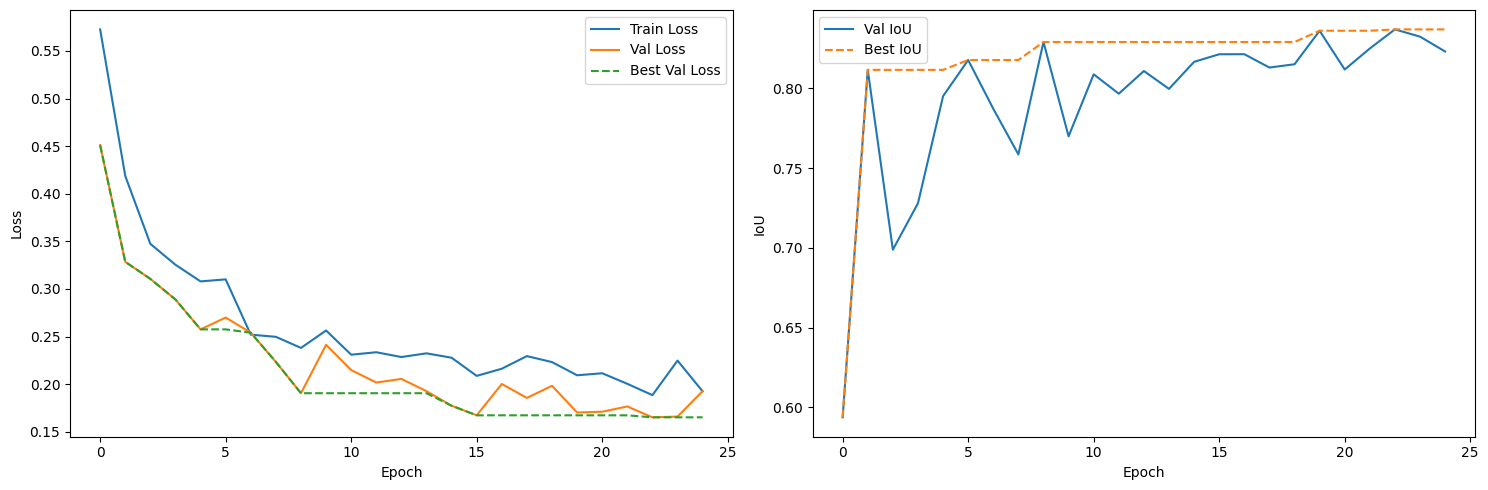

In [60]:
plot_training_curves()

Посмотрим на логи и **почистим** их:

In [52]:
!ls -la {Config.LOGS_DIR}

total 184
drwxr-xr-x  4 root root   4096 May 24 11:43 .
drwxr-xr-x 10 root root   4096 May 24 11:26 ..
-rw-r--r--  1 root root 170555 May 24 11:45 events.out.tfevents.1748086940.25be5f1c06d3.197.9
drwxr-xr-x  2 root root   4096 May 24 11:43 Loss_train
drwxr-xr-x  2 root root   4096 May 24 11:43 Loss_val


Посмотреть, как показала себя модель, обученная на сырых данных, можно в отдельной тетрадочке

In [53]:
!rm -rf {Config.LOGS_DIR}/*

In [54]:
!ls -la {Config.LOGS_DIR}

total 8
drwxr-xr-x  2 root root 4096 May 24 11:45 .
drwxr-xr-x 10 root root 4096 May 24 11:26 ..


##Сохранение:

In [ ]:
from google.colab import drive
try:
    drive.mount('/content/drive', force_remount=True)
    torch.save(model.state_dict(), '/content/drive/MyDrive/final_model.pt')
    !cp -r "/content/skin_lesion_segmentation/logs" "/content/drive/MyDrive/"
except Exception as e:
    print(f"Ошибка сохранения: {e}")
    !zip -r logs.zip /content/skin_lesion_segmentation/logs
    files.download('logs.zip')  # Альтернативное сохранение

Mounted at /content/drive


##**Тестирование:**

In [61]:
from torch.utils.data import DataLoader
from tqdm import tqdm
from metric import MeanIoU
import numpy as np

In [63]:
print(Config.VAL_RATIO, Config.TEST_RATIO)

0.1 0.1


In [62]:
    _, _, test_dataset = get_datasets(
        images_dir=Config.IMAGES_DIR,
        masks_dir=Config.MASKS_DIR,
        val_ratio=Config.VAL_RATIO,
        test_ratio=Config.TEST_RATIO,
        preprocess=Config.PREPROCESS_FLAG,
        crop_borders=True
    )

    test_loader = DataLoader(
        test_dataset,
        batch_size=Config.BATCH_SIZE,
        num_workers=Config.NUM_WORKERS,
        pin_memory=True
    )

    test_iou = evaluate(model, test_loader)
    print(f"\nTest IoU: {test_iou:.4f}")

It's okay
It's okay
It's okay
It's okay

Test IoU: 0.8257


In [64]:
def test_model(model, test_loader):
    model.eval()
    test_ious = []
    device = Config.DEVICE
    metric_fn = MeanIoU(classes_num=Config.NUM_CLASSES, ignore_index=-1).to(device)
    with torch.no_grad():
        for images, masks in tqdm(test_loader):
            outputs = model(images.to(device))
            iou = metric_fn(outputs, masks.to(device)).item()
            test_ious.append(iou)
    print(f"\nMean Test IoU: {np.mean(test_ious):.4f} ± {np.std(test_ious):.4f}")
    return test_ious

test_ious = test_model(model, test_loader)

100%|██████████| 5/5 [00:09<00:00,  1.84s/it]


Mean Test IoU: 0.8206 ± 0.0726


Расширенное тестирование:

In [45]:
from torchmetrics.classification import BinaryJaccardIndex as JaccardIndex
from torchmetrics.classification import BinaryF1Score as Dice
from torchmetrics import Precision, Recall
from collections import defaultdict

from prettytable import PrettyTable


def extended_evaluation(model, loader):
    device = next(model.parameters()).device

    metrics = {
        'iou': JaccardIndex().to(device),
        'dice': Dice().to(device),
        'precision': Precision(task='binary').to(device),
        'recall': Recall(task='binary').to(device)
    }

    results = defaultdict(list)

    with torch.no_grad():
        for images, masks in tqdm(loader, desc="Evaluation"):
            images = images.to(device)
            masks = masks.to(device)
            outputs = model(images)
            preds = torch.argmax(outputs, dim=1)

            for name, metric in metrics.items():
                results[name].append(metric(preds, masks).item())

    return {name: np.mean(vals) for name, vals in results.items()}

def full_evaluation(model, datasets):
    model.eval()
    results = {}

    # Собираем метрики для всех датасетов
    for name, dataset in datasets.items():
        loader = DataLoader(
            dataset,
            batch_size=Config.BATCH_SIZE,
            num_workers=0,
            pin_memory=True
        )
        results[name] = extended_evaluation(model, loader)

    # Создаем и настраиваем таблицу
    table = PrettyTable()
    table.field_names = ["Метрика", "Train", "Val", "Test"]
    table.align["Метрика"] = "l"  # Выравнивание по левому краю
    table.align["Train"] = "r"     # Выравнивание по правому краю
    table.align["Val"] = "r"
    table.align["Test"] = "r"
    table.float_format = ".4"      # Формат чисел (4 знака после запятой)

    # Добавляем строки с метриками
    for metric in results['train'].keys():
        row = [metric.replace('_', ' ').title()]  # Преобразуем snake_case в нормальный вид
        for dataset in ['train', 'val', 'test']:
            row.append(results[dataset][metric])
        table.add_row(row)

    # Выводим таблицу с заголовком
    print("\n" + "="*50)
    print("РЕЗУЛЬТАТЫ ОЦЕНКИ МОДЕЛИ".center(50))
    print("="*50)
    print(table)
    print("="*50 + "\n")

    return results

Расширенная оценка:

In [65]:
    train_ds, val_ds, test_ds = get_datasets(
        images_dir=Config.IMAGES_DIR,
        masks_dir=Config.MASKS_DIR,
        val_ratio=Config.VAL_RATIO,
        test_ratio=Config.TEST_RATIO,
        #preprocess=Config.PREPROCESS_FLAG,
        preprocess=False,
        crop_borders=True
    )

    # Вызываем полную оценку
    datasets = {
        'train': train_ds,
        'val': val_ds,
        'test': test_ds
    }

    metrics = full_evaluation(model, datasets)

It's okay


Evaluation: 100%|██████████| 5/5 [00:00<00:00,  5.87it/s]


             РЕЗУЛЬТАТЫ ОЦЕНКИ МОДЕЛИ             
+-----------+--------+--------+--------+
| Метрика   |  Train |    Val |   Test |
+-----------+--------+--------+--------+
| Iou       | 0.7423 | 0.7147 | 0.7179 |
| Dice      | 0.8461 | 0.8258 | 0.8293 |
| Precision | 0.9187 | 0.8555 | 0.9022 |
| Recall    | 0.8026 | 0.8334 | 0.7747 |
+-----------+--------+--------+--------+



Визуализация предсказаний:

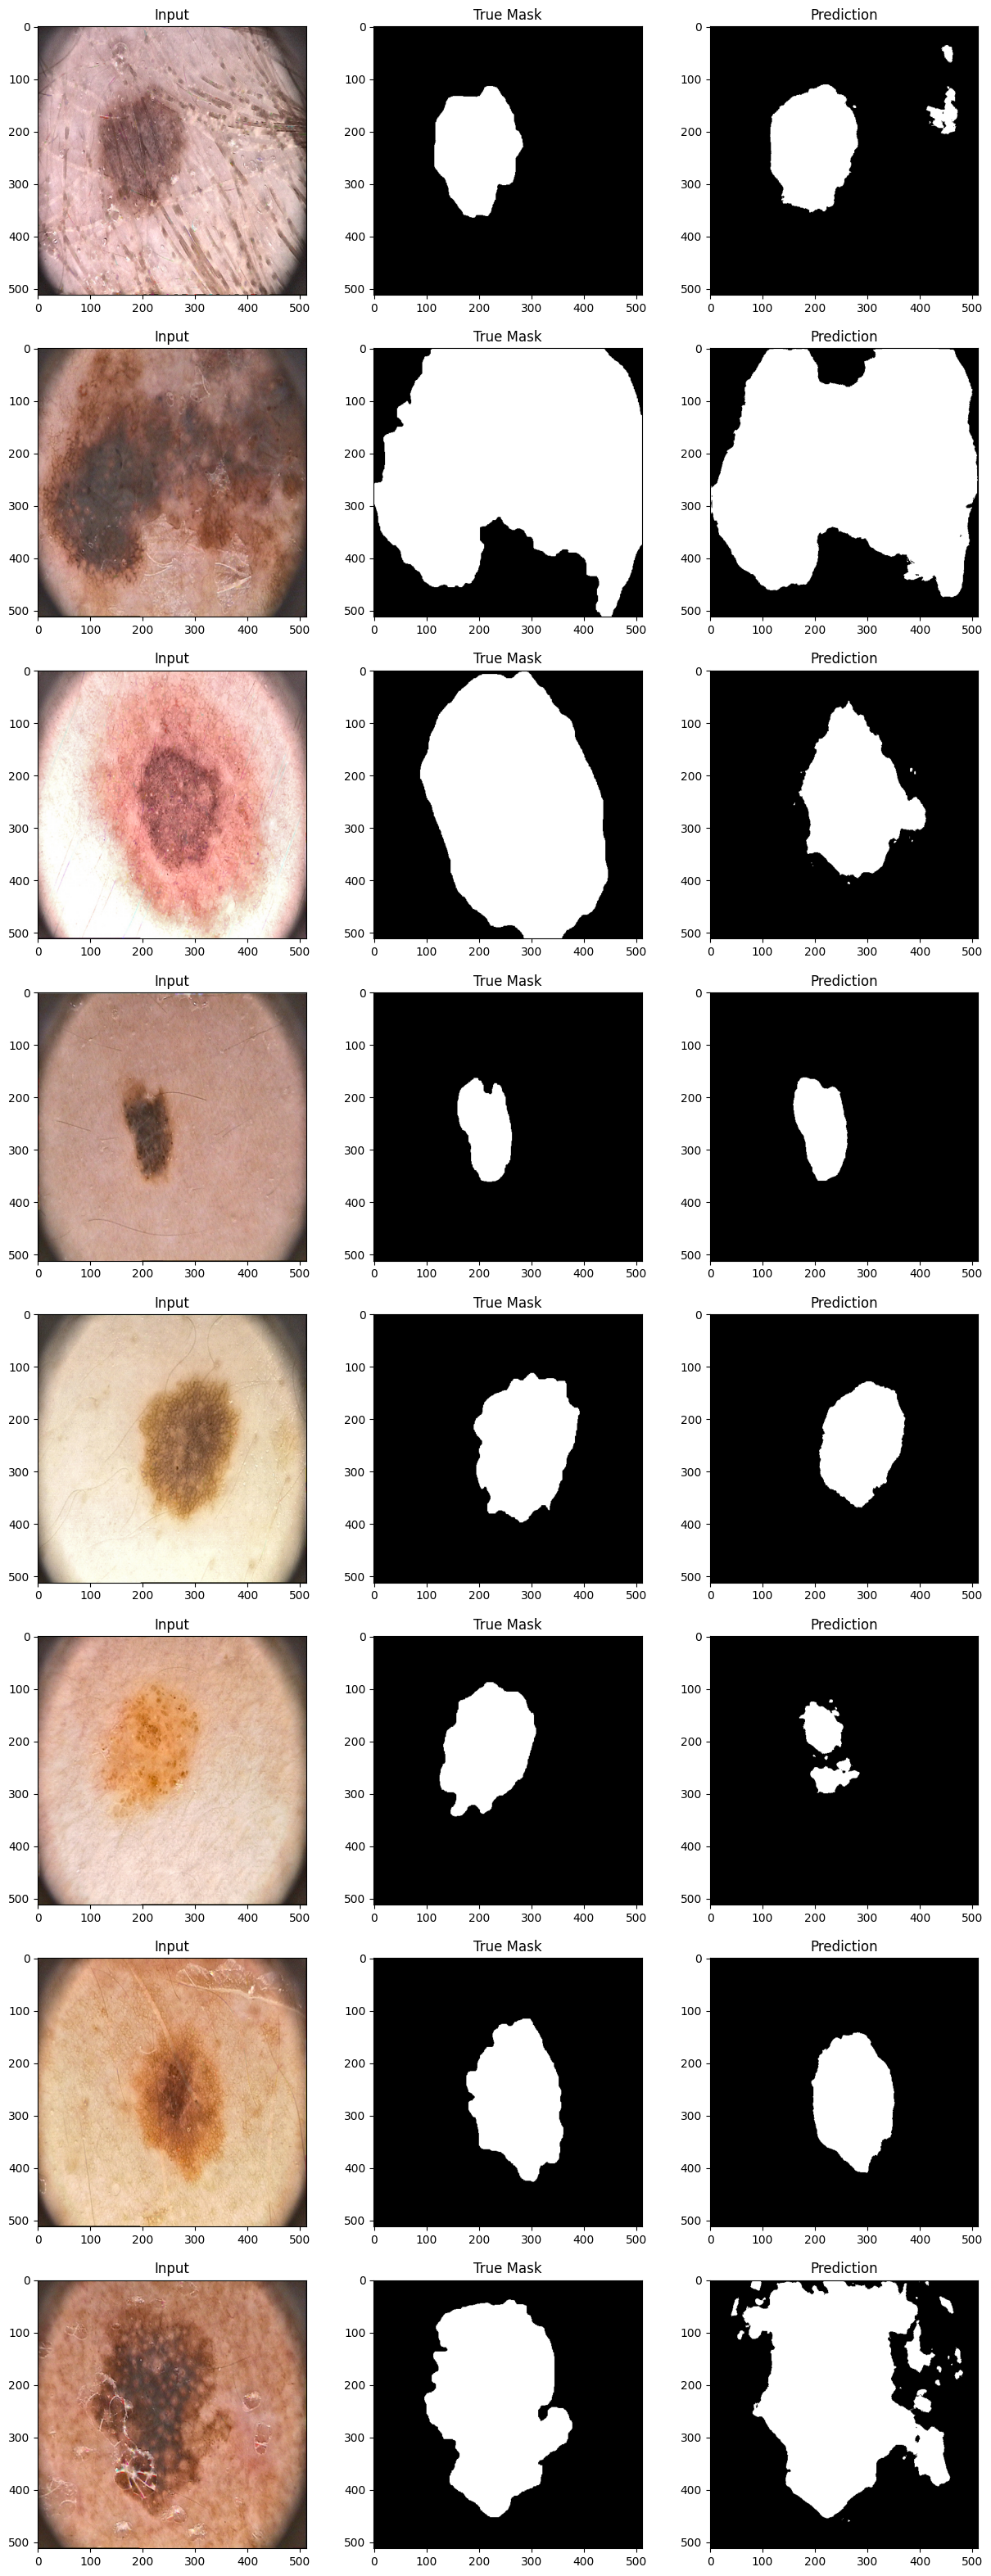

In [66]:
def show_predictions(model, dataset, n=3):
    model.eval()
    fig, axes = plt.subplots(n, 3, figsize=(15, n*5))
    device = Config.DEVICE
    for i in range(n):
        img, true_mask = dataset[i]
        with torch.no_grad():
            pred = model(img.unsqueeze(0).to(device)).argmax(1).squeeze().cpu()

        axes[i, 0].imshow(img.permute(1, 2, 0))
        axes[i, 1].imshow(true_mask.squeeze(), cmap='gray')
        axes[i, 2].imshow(pred, cmap='gray')

        axes[i, 0].set_title("Input")
        axes[i, 1].set_title("True Mask")
        axes[i, 2].set_title("Prediction")
    plt.show()

show_predictions(model, test_dataset, 8)

**Очистка** перед повторным запуском:

In [ ]:
!rm -rf {Config.LOGS_DIR}/*

In [ ]:
!ls -la {Config.LOGS_DIR}

total 8
drwxr-xr-x  2 root root 4096 May 23 12:14 .
drwxr-xr-x 10 root root 4096 May 23 11:45 ..


Посмотреть на эпоху с meanIoU == 0.49

Хорошо бы посмотреть, какие вообще результаты даёт базовая юнет и подумать про модификации (поискать статьи)

In [ ]:
print("Congrats!")

In [ ]:
exit()